In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv("titanictrain.csv")
test=pd.read_csv("titanictest.csv")

In [4]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [5]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [6]:
#feature engineering
# missing values
#one hot encoding

In [7]:
#combine the data
combined=pd.concat([train,test],ignore_index=True)

In [8]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#check missing values
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [10]:
combined.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
cabins=[ 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
       'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
       'C148', 'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28',
       'C51', 'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80',
       'C89', 'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D40', 'D38', 'C105']

In [12]:
train.shape,test.shape,combined.shape

((891, 12), (418, 11), (1309, 12))

In [13]:
def cabin_labels(x):
    if x in cabins:
        return('Cabin_avail')
    else:
        return('missing')

In [14]:
#lets apply this on cabin column
combined['Cabin_cat']=combined['Cabin'].apply(cabin_labels)

<Axes: xlabel='Survived'>

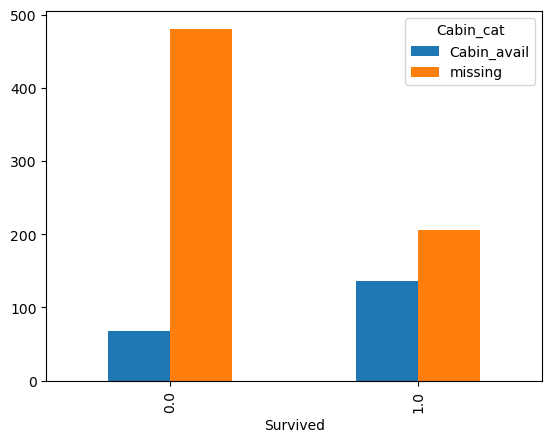

In [15]:
pd.crosstab(combined.Survived,combined.Cabin_cat).plot(kind='bar')

In [16]:
# NAME
titles=[]
for i in combined.Name:
    titles.append(i.split(",")[1].split(".")[0])


In [17]:
combined['titles']=pd.Series(titles)

In [18]:
combined.titles.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [19]:
titles_ignore=[ ' Don', ' Rev', ' Dr', ' Mme', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt', ' the Countess',
               ' Jonkheer', ' Dona']
def notitle(x):
    if x in titles_ignore:
        return ('others')
    else: 
        return (x)

In [20]:
combined.titles.apply(notitle).unique()

array([' Mr', ' Mrs', ' Miss', ' Master', 'others', ' Ms'], dtype=object)

In [21]:
combined['titles']=combined.titles.apply(notitle)

In [22]:
combined.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [23]:
combined.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_cat,titles
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,missing,Mr
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Cabin_avail,Mrs


In [24]:
combined.drop(['Ticket'],axis=1,inplace=True)

In [25]:
combined.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_cat,titles
0,0.0,3,male,22.0,1,0,7.2500,S,missing,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Cabin_avail,Mrs


In [26]:
combined['Family']=combined.SibSp+combined.Parch+1

In [27]:
combined.Family.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [28]:
def parivar(x):
    if x==1:
        return ('solo')
    elif x==2:
        return('duo')
    elif x<=4:
        return('small')
    else:
        return('large')

In [29]:
combined['Family_cat']=combined['Family'].apply(parivar)

<Axes: xlabel='Survived'>

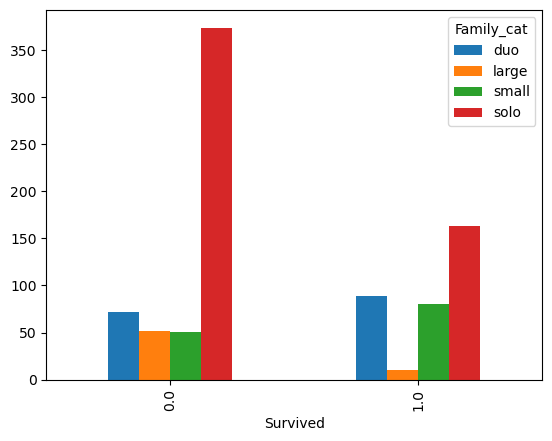

In [30]:
pd.crosstab(combined.Survived,combined.Family_cat).plot(kind='bar')

In [31]:
#missing value
combined.groupby('titles')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
titles,,,,,,,,
Master,53.0,5.482642,4.161554,0.33,2.0,4.0,9.0,14.5
Miss,210.0,21.774238,12.249077,0.17,15.0,22.0,30.0,63.0
Mr,581.0,32.252151,12.422089,11.00,23.0,29.0,39.0,80.0
Mrs,170.0,36.994118,12.901767,14.00,27.0,35.5,46.5,76.0
Ms,1.0,28.000000,NaN,28.00,28.0,28.0,28.0,28.0
others,31.0,43.129032,12.309189,23.00,32.5,45.0,52.5,70.0


In [32]:
missing_titles=combined.loc[combined.Age.isnull(),'titles'].unique()

In [33]:
for i in missing_titles:
    combined.loc[combined.Age.isnull(),'Age']=combined.loc[combined.titles==i,'Age'].median()

In [34]:
combined.loc[combined.Embarked.isnull(),'Embarked']=combined.Embarked.mode()[0]

In [35]:
combined.loc[combined.Fare.isnull(),'Fare']=combined.Fare.median()

In [36]:
#split data back in train and test
newtrain=combined.loc[0:train.shape[0]-1,]
newtest=combined.loc[train.shape[0]:,]
newtrain.shape,newtest.shape

((891, 12), (418, 12))

In [37]:
X=newtrain.drop(['Survived'],axis=1)
Y=newtrain.Survived.astype(int)
newtest.drop(['Survived'],axis=1,inplace=True)

In [38]:
#model building
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':0})
submission.to_csv('basemodel.csv',index=False)

In [39]:
cd

C:\Users\ASUS


In [40]:
#dummify the data
newX=pd.get_dummies(X,drop_first=True)
newtest=pd.get_dummies(newtest,drop_first=True)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lg=LogisticRegression()
pred=lg.fit(newX,Y).predict(newtest)

In [43]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':pred})
submission.to_csv('logistic_titanic.csv',index=False)  #76.315

In [44]:
cd

C:\Users\ASUS


### Model metrics and evaluation
* VIF
* logit model
* interpretations of coefficient
* prediction using sigmoid
* pseudo r2
* statistical test
* deviance
* AIC

In [45]:
import statsmodels.api as sma

In [46]:
model=sma.Logit(Y,newX).fit()
model.summary()

         Current function value: 0.397365
         Iterations: 35


C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      873
Method:                           MLE   Df Model:                           17
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.4033
Time:                        10:52:34   Log-Likelihood:                -354.05
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.198e-91
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pclass               -0.8026      0.187     -4.292      0.000      -1.169      -0.436
Age                  -0.0234      0.009     -2.505      0.012      -0.042      -0.005
SibSp               -30.2434   1.27e+05     -0.000      1.000   -2.48e+05    2.48e+05
Parch               -30.1357   1.27e+05     -0.000      1.000   -2.48e+05    2.48e+05
Fare                  0.0034      0.003      1.314      0.189      -0.002       0.009
Family               30.1636   1.27e+05      0.000      1.000   -2.48e+05    2.48e+05
Sex_male            -25.4186   1.27e+05     -0.000      1.000   -2.48e+05    2.48e+05
Embarked_Q            0.0330      0.401      0.082      0.935      -0.754       0.819
Embarked_S           -0.3189      0.254     -1.256      0.209      -0.816       0.179
Cabin_cat_missing    -0.6404      0.322     -1.991      0.047      -1.271      -0.010
titles_ Miss        -26.0842   1.27e+05     -0.000      1.000   -2.48e+05    2.48e+05
titles_ Mr           -3.5874      0.598     -6.003      0.000      -4.759      -2.416
titles_ Mrs         -25.4044   1.27e+05     -0.000      1.000   -2.48e+05    2.48e+05
titles_ Ms          -10.5080   1.27e+05  -8.29e-05      1.000   -2.49e+05    2.49e+05
titles_others        -3.5582      0.824     -4.316      0.000      -5.174      -1.942
Family_cat_large     -2.5015      1.291     -1.937      0.053      -5.032       0.029
Family_cat_small      0.1452      0.500      0.291      0.771      -0.834       1.125
Family_cat_solo       0.3804      0.391      0.972      0.331      -0.387       1.148
=====================================================================================
"""

# basic inferences on output
* there are lot of features which have a very high pvalue which indicates that the features are statistically insignificant
* this also indicates that there is lot of multicolineraity btw the categorically predictors
* warnings also suggest that the model is not a good model bcoz MLE could not help converge the sigmoid curve"


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:

vif=[]
for i in range(newX.shape[1]):
    vif.append(variance_inflation_factor(newX.values,i))

In [49]:
pd.DataFrame(vif,columns=['Values'],index=newX.columns).sort_values(ascending=False,by='Values')

,Values
Family,1541.844876
SibSp,386.127423
Parch,208.163779
Sex_male,45.570269
titles_ Miss,38.104557
titles_ Mrs,29.624656
titles_ Mr,8.477798
Family_cat_large,8.368818
Family_cat_solo,3.209859
Family_cat_small,2.982278


In [50]:
subset=newX.drop(['SibSp','Parch','Sex_male'],axis=1)

In [51]:
#rebuild the model
model=sma.Logit(Y,subset).fit()
model.summary()

         Current function value: 0.421190
         Iterations: 35


C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      876
Method:                           MLE   Df Model:                           14
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.3675
Time:                        10:52:43   Log-Likelihood:                -375.28
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.084e-84
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pclass               -0.2969      0.168     -1.773      0.076      -0.625       0.031
Age                  -0.0131      0.009     -1.504      0.133      -0.030       0.004
Fare                  0.0097      0.003      3.240      0.001       0.004       0.016
Family                0.5728      0.170      3.372      0.001       0.240       0.906
Embarked_Q            0.1156      0.394      0.293      0.769      -0.657       0.888
Embarked_S           -0.0706      0.241     -0.293      0.769      -0.542       0.401
Cabin_cat_missing    -0.7748      0.314     -2.468      0.014      -1.390      -0.159
titles_ Miss          0.8299      0.449      1.847      0.065      -0.051       1.711
titles_ Mr           -1.9628      0.468     -4.195      0.000      -2.880      -1.046
titles_ Mrs           1.5941      0.507      3.145      0.002       0.601       2.587
titles_ Ms           21.3221   4.64e+04      0.000      1.000   -9.09e+04    9.09e+04
titles_others        -1.0974      0.632     -1.736      0.082      -2.336       0.141
Family_cat_large     -5.0538      1.047     -4.825      0.000      -7.107      -3.001
Family_cat_small     -0.0480      0.396     -0.121      0.903      -0.823       0.727
Family_cat_solo       1.2741      0.321      3.971      0.000       0.645       1.903
=====================================================================================
"""

In [52]:
#lets remove the high pvalue
feats=[]
for i in model.pvalues:
    if i<0.05:
        feats.append(model.pvalues.index)

In [53]:
localdf=pd.DataFrame(model.pvalues,columns=['Pvalue']).reset_index()

In [54]:
feats=list(localdf.loc[localdf['Pvalue']<0.05,'index'])

In [55]:
#model of important features
newfeats=subset.loc[:,feats]
model=sma.Logit(Y,newfeats).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.434542
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.3474
Time:                        10:52:47   Log-Likelihood:                -387.18
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.329e-86
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fare                  0.0109      0.003      4.200      0.000       0.006       0.016
Family                0.4258      0.098      4.363      0.000       0.235       0.617
Cabin_cat_missing    -0.9245      0.232     -3.977      0.000      -1.380      -0.469
titles_ Mr           -2.5722      0.203    -12.698      0.000      -2.969      -2.175
titles_ Mrs           0.8667      0.293      2.958      0.003       0.292       1.441
Family_cat_large     -4.4873      0.639     -7.018      0.000      -5.740      -3.234
Family_cat_solo       0.9603      0.219      4.387      0.000       0.531       1.389
=====================================================================================
"""

### Predict the output using sigmoid

In [56]:
model.params

Fare                 0.010875
Family               0.425778
Cabin_cat_missing   -0.924455
titles_ Mr          -2.572236
titles_ Mrs          0.866743
Family_cat_large    -4.487282
Family_cat_solo      0.960324
dtype: float64

In [57]:
newtest.head(1)

,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Cabin_cat_missing,titles_ Miss,titles_ Mr,titles_ Mrs,titles_ Ms,titles_others,Family_cat_large,Family_cat_small,Family_cat_solo
891,3,34.5,0,0,7.8292,1,1,1,0,1,0,1,0,0,0,0,0,1


In [58]:
newtest.loc[:,feats].head(1)

,Fare,Family,Cabin_cat_missing,titles_ Mr,titles_ Mrs,Family_cat_large,Family_cat_solo
891,7.8292,1,1,1,0,0,1


# Equation for prediction
* log(odds)=beta1*fare+beta2*family+beta3*cabin_cat_missing+.....

In [59]:
logit=model.params[0]*newtest['Fare']+model.params[1]*newtest['Family']+model.params[2]*\
newtest['Cabin_cat_missing']+model.params[3]*newtest['titles_ Mr']+model.params[4]*newtest['titles_ Mrs']\
+model.params[5]*newtest['Family_cat_large']+model.params[6]*newtest['Family_cat_solo']

In [60]:
prob=1/(1+np.exp(-logit))
print('prob using sigmoid:',pd.DataFrame(prob).head(1))
direct=model.predict(newtest.loc[:,feats].head(1))
print('direct function:',direct)

prob using sigmoid:             0
891  0.116557
direct function: 891    0.116557
dtype: float64


### Interpretations of  coefficient

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.3474
Time:                        10:52:56   Log-Likelihood:                -387.18
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.329e-86
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fare                  0.0109      0.003      4.200      0.000       0.006       0.016
Family                0.4258      0.098      4.363      0.000       0.235       0.617
Cabin_cat_missing    -0.9245      0.232     -3.977      0.000      -1.380      -0.469
titles_ Mr           -2.5722      0.203    -12.698      0.000      -2.969      -2.175
titles_ Mrs           0.8667      0.293      2.958      0.003       0.292       1.441
Family_cat_large     -4.4873      0.639     -7.018      0.000      -5.740      -3.234
Family_cat_solo       0.9603      0.219      4.387      0.000       0.531       1.389
=====================================================================================
"""

In [62]:
np.exp(0.0109) # increase of Odds

# By an increase of Fare by 1 dollar, the odds of surviving increase by 100x

1.0109596214276102

In [63]:
np.exp(-4.4873)
# by an increase of 1 family member,the odds of their survival decrease of 1.1%
# this means that the increase of family member is negatively correlated with the survival of passengers.

0.011250980483955841

## Pseudo R2

* **McFadden R2** -here,the r2 is not similar to the linear regression. there in we interpret the r2 as the ratio of variance in Y explained by X
* because the variance in Y is not explained by X in logistic regression however,r2 exists and therefore it is called Pseudo R2.
* therefore ,McFadden R2 is calculated by taking log of (likelihood of full model/likelihood of null model). this is 1-(LLF/LLN)
*  **Note** - the value of McFadden R2 will be in the range of 0 and 1.
* **here,0 represents that the model has no explanatory power where as 1 represents the model has a very high explanatory power.**
* the range of McFadden is 0.2 to 0.4. generally if the model has the R2 falling in this range then we can say the model is good.



In [64]:
#McFadden
model.llf

-387.17657006194247

In [65]:
model.llnull


-593.3275684771272

In [66]:
mcfadden=1-(model.llf/model.llnull)
print('McFadden R2:',mcfadden)

McFadden R2: 0.3474488787775447


In [67]:
# Cox and Snell

L0=np.exp(model.llnull)
L1=np.exp(model.llf)

cox_snell=1-(L0/L1)** (2/newX.shape[0])

In [68]:
#Nagelkerke
nagelkerke=cox_snell/(1-L0**(2/newX.shape[0]))
print('McFadden:',mcfadden)
print('Cox and Snell:',cox_snell)
print('Nagelkerke:',nagelkerke)

McFadden: 0.3474488787775447
Cox and Snell: 0.37044416823032167
Nagelkerke: 0.5033176723723485


* **NOTE:which one to go with**
* McFadden is generally a conservative estimate
* Cox and Snell is used to compare the nested models and thus it  carries a lot of references there. Because the value of R2 is adjusted on the basis of n.
* Nagelkerke is based on Cox and Snell but it is more better estimate because it can easily achieve values closer to 1 (not really) but it is highest R2 amongst all.
* therefore,Nagelkerke is the go to R2 value for the model.

### AIC

In [69]:
model.aic

788.3531401238849

In [70]:
#wald test
# model.bse represents standard error
teststats=model.params[0]/model.bse[0]
teststats

#pvalue
#since the LogReg model follow Chi Square Distt...


4.19959190435997

In [71]:
import scipy.stats as stats

In [72]:
stats.chi2.sf(teststats,1)
#Wald test has df of 1

0.04043370868682502